In [1]:
from helpers import * 
from biasvariance import *
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestRegressor

/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [22]:
rf = RandomForestRegressor(n_estimators=1000,random_state=42)

In [23]:
rf.fit(features_selected_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [24]:
rf_predictions = rf.predict(features_selected_test)

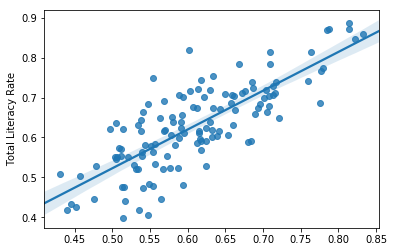

In [25]:
sns.regplot(rf_predictions, y_test)

In [26]:
rf_r2 = rf.score(features_selected_train, y_train)
rf_ar2 = 1 - (1-rf.score(features_selected_train, y_train))*(len(y_test)-1)/(len(y_test)-features_selected_test.shape[1]-1)

In [27]:
print('R2:', rf_r2, 'AdjustR2:', rf_ar2)
print('MSE:', mean_squared_error(y_test, rf_predictions))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_predictions)))
print('Normalized RMSE:',np.sqrt(mean_squared_error(y_test, rf_predictions))/ y_test.std())

R2: 0.9394463700034609 AdjustR2: 0.9260547018311494
MSE: 0.004759469819842476
RMSE: 0.06898891084690695
Normalized RMSE: 0.6347374643533829


In [10]:
kfold5 = KFold(n_splits=5, shuffle=True, random_state=42)
kfold10 = KFold(n_splits=10, shuffle=True, random_state=42)
kfold20 = KFold(n_splits=20, shuffle=True, random_state=42)

In [13]:
cv_5_results = np.mean((cross_val_score(rf, features_selected_train, y_train, cv=kfold5)))
cv_10_results = np.mean((cross_val_score(rf, features_selected_train, y_train, cv=kfold10)))
cv_20_results = np.mean((cross_val_score(rf, features_selected_train, y_train, cv=kfold20)))

In [14]:
print(cv_5_results, cv_10_results, cv_20_results)

0.5429674765351498 0.5189223776498547 0.5085515777899491
